In [1]:
%matplotlib widget
from easydynamics.analysis import Analysis

import numpy as np

from easydynamics.sample import GaussianComponent
from easydynamics.sample import LorentzianComponent
# from easydynamics.sample import DHOComponent
from easydynamics.sample import PolynomialComponent
from easydynamics.sample import SampleModel

from easydynamics.experiment  import Experiment

import matplotlib.pyplot as plt


In [2]:

MyAnalysis = Analysis(name='MyAnalysis')


# Gaussian1= GaussianComponent(center=0,width=0.3,amplitude=1)
Gaussian1= GaussianComponent(center=-0.4e-3,width=0.5e-3,amplitude=0.05)
# Gaussian2= GaussianComponent(center=0,width=1e-3,amplitude=1.3)
Lorentzian=LorentzianComponent(center=-0.4e-3, width=2e-3, amplitude=0.01)
# DHO=DHOComponent(center=1, width=0.3, area=1.2)
Background=PolynomialComponent(coefficients=[1e-3])

Sample= SampleModel()
Sample.add_component(Gaussian1)
Sample.add_component(Lorentzian)
Sample.add_component(Background)
# Sample.add_component(DHO)


# Resolution=SampleModel()
# Resolution.add_component(Gaussian2)

# Background=SampleModel()
# Background.add_component(PolynomialComponent(coefficients=[0.01]))

MyAnalysis.set_sample_model(Sample)
# MyAnalysis.set_resolution_model(Resolution)
# MyAnalysis.set_background_model(Background)

# x=np.linspace(-0.03, 0.03, 1000)
# y=MyAnalysis.calculate_theory(x)
# plt.figure(figsize=(10, 6))
# plt.plot(x, y, label='Theoretical Model', color='blue')
# plt.xlabel('x')
# plt.ylabel('y')

vanadium_data=Experiment.load_example_vanadium_data_1d()
vanadium_data.plot()

MyAnalysis.set_data(vanadium_data)

# fit_result=MyAnalysis.fit()


In [3]:
print(MyAnalysis.get_fit_parameters())


[<Parameter 'center': -0.0004 meV, bounds=[-inf:inf]>, <Parameter 'width': 0.0005 meV, bounds=[-inf:inf]>, <Parameter 'amplitude': 0.0500, bounds=[-inf:inf]>, <Parameter 'center': -0.0004 meV, bounds=[-inf:inf]>, <Parameter 'width': 0.0020 meV, bounds=[-inf:inf]>, <Parameter 'amplitude': 0.0100, bounds=[-inf:inf]>, <Parameter 'c0': 0.0010, bounds=[-inf:inf]>]


In [4]:

fit_result=MyAnalysis.fit()
# print(fit_result[0].n_pars)


# a=MyAnalysis.parameters
fit_result[0].p

{'pParameter_0': np.float64(-0.0003932437485136367),
 'pParameter_1': np.float64(0.0003927265458278023),
 'pParameter_2': np.float64(0.052625167859222714),
 'pParameter_3': np.float64(-0.0005319030798954655),
 'pParameter_4': np.float64(0.0005119909485257434),
 'pParameter_5': np.float64(0.002828341825331551),
 'pParameter_6': np.float64(0.0001560467145281797)}

In [5]:
fit_result[0].p0

{'pParameter_0': np.float64(-0.0004),
 'pParameter_1': np.float64(0.0005),
 'pParameter_2': np.float64(0.05),
 'pParameter_3': np.float64(-0.0004),
 'pParameter_4': np.float64(0.002),
 'pParameter_5': np.float64(0.01),
 'pParameter_6': np.float64(0.001)}

In [6]:
MyAnalysis.get_fit_parameters()

[<Parameter 'center': -0.0004 ± 0.0000 meV, bounds=[-inf:inf]>,
 <Parameter 'width': 0.0004 ± 0.0000 meV, bounds=[-inf:inf]>,
 <Parameter 'amplitude': 0.0526 ± 0.0036, bounds=[-inf:inf]>,
 <Parameter 'center': -0.0005 ± 0.0001 meV, bounds=[-inf:inf]>,
 <Parameter 'width': 0.0005 ± 0.0004 meV, bounds=[-inf:inf]>,
 <Parameter 'amplitude': 0.0028 ± 0.0043, bounds=[-inf:inf]>,
 <Parameter 'c0': 0.0002 ± 0.0000, bounds=[-inf:inf]>]

In [7]:
# data=MyAnalysis.get_data()
# plt.figure(figsize=(10, 6))
# plt.errorbar(data[0],data[1],yerr=data[2], label='Data', color='black', marker='o', linestyle='None',markerfacecolor='none')
# plt.xlim(-0.02, 0.02)
# plt.ylim(0, 0.07)
   
# xx=np.linspace(-0.02, 0.02, 1000)
# yy=MyAnalysis.calculate_theory(xx)
# plt.plot(xx, yy, label='Theoretical Model', color='red')

# Gaussian3= GaussianComponent(center=-0.5e-3,width=0.5e-3,amplitude=0.05)
# plt.plot(xx,Gaussian3.evaluate(xx), label='Gaussian1', color='green')

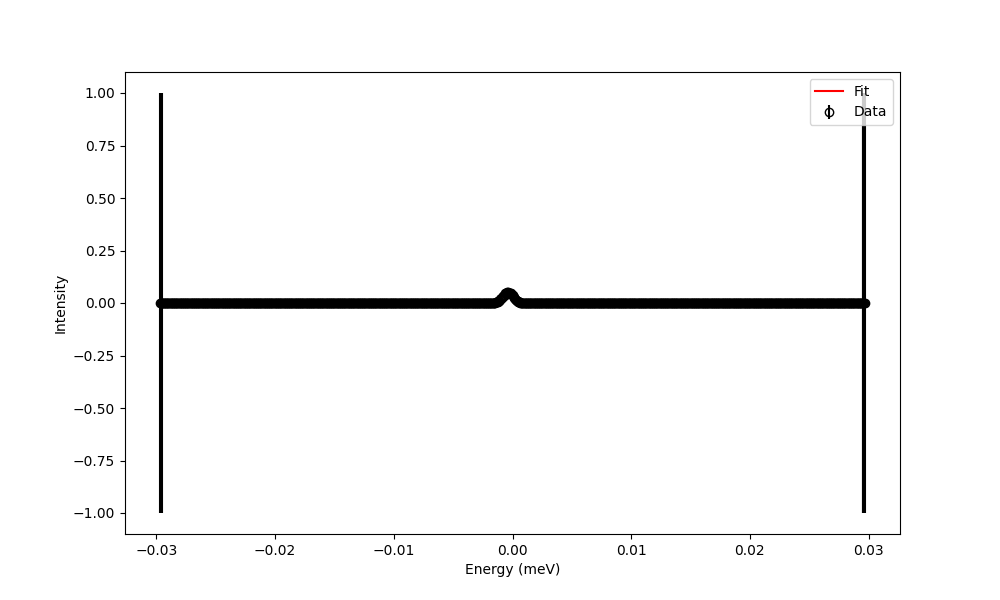

(0.0, 0.07)

In [9]:
fig=MyAnalysis.plot_data_and_fit()
# fig.xlim(-0.02, 0.02)
# fig.ylim(0, 0.07)

fig.axes[0].set_xlim(-0.02, 0.02)
fig.axes[0].set_ylim(0, 0.07)